# Calculus
We can use computer algebra systems like `sympy` to do calculus. Here we will discuss, differentiation, integration and limits.

In [1]:
import sympy as sy
sy.init_printing()

## Differentiation

First let us see `sympy` something simple. We know that the derivative of $e^{kx}$ with respect to $x$ is $k e^{kx}$. Let us see `sympy` do this. We take the following steps.

- Define a symbol `x`
- Define a symbol `k`
- Define a variable `f` which has the expression we want, using `sympy.exp` for the exponential function and usual `*` for multiplication and `/` for division.
- Use the function `sympy.diff` to differentiate `f` with respect to `x`.

In [2]:
# Differentation of k*exp(k)
x = sy.Symbol('x')
k = sy.symbols('k')
exp_kx = sy.exp(k*x)
sy.diff(exp_kx, x)

Next let us try something more complicated. Consider the function $V(r) = \frac{C}{r}$, which is ubiquitous in physics. Let us imagine this is the electric potential of a point charge at the origin. We want the three Cartesian components of the Electric Field. We do this as follows.

- Define symbols `x`, `y`, `z`
- Define a symbol `r` using the function `sympy.sqrt`, that is `r = sympy.sqrt(x**2 + y**2 + z**2)`
- Define a symbol `C`
- Define `V` as the ratio of `C` and `r`.
- Define `Ex` to be the derivative of `V` with respect to `x`
- Define `Ey` to be the derivative of `V` with respect to `y`
- Define `Ez` to be the derivative of `V` with respect to `z`
- Display the values of `Ex`, `Ey` and `Ez` with the expression `(Ex, Ey, Ez)`

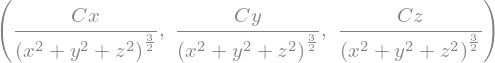

In [3]:
# Electric field of a point charge at the origin from the potential
x, y, z = sy.symbols('x, y, z')
r = sy.sqrt(x**2 + y**2 + z**2)
C = sy.Symbol('C')
V = C / r
Ex = -sy.diff(V, x)
Ey = -sy.diff(V, y)
Ez = -sy.diff(V, z)
(Ex, Ey, Ez)

## Integration

Computer algebra systems like `sympy` can perform definite and indefinite integration. 

First we look at definite integrals. Let us consider the is the following definite integral.
$$\int_{0}^{2\pi} d\phi (\sin(\phi))^2$$
We know the answer is $\pi$. Let us do this in `sympy`.

We do this as follows.
- Define a symbol `phi`
- Define an expression `sin_sq` which uses `sympy.sin` to compute the sine of a function symbolically
- Use `sympy.integrate` to integrate our function `sin_sq` with respect to `phi` from `0` to `2*sympy.pi`. We denote the bounds as `(phi, 0, 2*sympy.pi)`

In [4]:
# Definite integraion of (sin(phi))^2
phi = sy.symbols('phi')
sin_sq = sy.sin(phi)**2
sy.integrate(sin_sq, (phi, 0, 2*sy.pi))

Next we consider indefinite integration. We consider the following indefinite integral.
$$\int d\phi (\sin(\phi))^2$$
 
Let us do this in `sympy`. We do this as follows.
- Define a symbol `phi`
- Define an expression `sin_sq` which uses `sympy.sin` to compute the sine of a function symbolically
- Use `sympy.integrate` to integrate our function `sin_sq` with respect to `phi`. No bounds are required as this is an an indefinite integral.

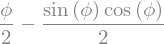

In [5]:
# Indefinite integration of (sin(phi))^2
phi = sy.symbols('phi')
sin_sq = sy.sin(phi)**2
sy.integrate(sin_sq, phi)

Next, we consider a Gaussian integral
$$
\int_{-\infty}^{+\infty} \mathrm{d} y 
\exp\left( - ay^2 + by\right)
$$
- Define a symbol `y` which is the variable integrated over. Define a symbol `a` which is constant for the purpose of integration.
- Define an expression `exp_quad_y` which uses `sympy.exp` to calculate the Gaussian function symbolically.
- Use sympy.integrate to integrate our function `exp_quad_y` with respect to `y`.
- The bounds of the integral are $-\infty$ to $+\infty$ which are represented using `-sympy.oo` and `sympy.oo` respectively

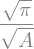

In [6]:
# Gaussian integral
y = sy.Symbol('y')
a = sy.Symbol('A', positive=True)
exp_quad_y = sy.exp(- a * y**2)
integral_exp_quad_y = sy.integrate(exp_quad_y, (y, -sy.oo, sy.oo))

integral_exp_quad_y

## Energy eigenfunctions for 1 dimensional quantum harmonic oscillator

Let us do some quantum mechanics. We consider a particle of mass $M$ in a one dimensional quantum harmonic oscillator of frequency $\omega$. The Hamiltonian is $H = \frac{\hat{P}^2}{2M} + \frac{M\omega^2\hat{Q}^2}{2}$, where $\hat{P}$ and $\hat{Q}$ are the momentum and position operators respectively.

Choosing dimensionless momentum and position operators $\hat{p} = \sqrt{\frac{1}{M\hbar\omega}} \hat{P}$ and $\hat{q} = \sqrt{\frac{M\omega}{\hbar}} \hat{Q}$, the Hamiltonian becomes $H = \frac{\hbar\omega}{2}(\hat{p}^2 + \hat{q}^2)$.

Let $p$ and $q$ denote the eigenvalues of operators $\hat{p}$ and $\hat{q}$. Then the energy eigenfunctions in the position representation are 
$$\psi_n(q) = C_n H_n(q) \exp\left(-\frac{1}{2}q^2\right).$$

Here $C_n$ is the normalization factor, which we can find by integrating over all $q$ and $H_n(q)$ is the $n^{\text{th}}$ Hermite polynomial in $q$. Choosing a real $C_n$, we have

$$C_n = \left(\int_{-\infty}^{+\infty}dq \left|H_n(q) \exp\left(-\frac{1}{2}q^2\right)\right|^2\right)^{-1/2}$$

Let us normalize some of the energy eigenfunctions. Let us consider $n = 4$. We do this as follows.
- Define a variable `psi_un` denoting the unnormalizd function. Write `psi_un` using `sympy.special.polynomials.hermite` to get the $n^{\text{th}}$ Hermite polynomial and `sympy.exp` to get the exponential factor.
- Find `C_n` using the reciprocal of the square root of the integral of square of the absolute value of `psi_un`.
    - Use `sympy.Abs` to get the absolute value of `psi_un`. Square this using `**2` to get the square of absolute value.
    - Use `sympy.integrate` to integrate this over `x` from `- sympy.oo` to `+ sympy.oo`.
    - Use this in an expression for `C_n`.
- Write `psi` as a product of `C_n` and `psi_un`


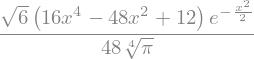

In [7]:
# Normalization of 1 dimensional harmonic oscillator energy eigenfunctions
n = 4
x = sy.symbols('x')
hermite_n = sy.hermite(n, x)
psi_n_un = hermite_n * sy.exp(-x**2/2)
psi_n_un_norm = sy.integrate(sy.Abs(psi_n_un)**2, (x, -sy.oo, +sy.oo))
C_n = 1 / sy.sqrt(psi_n_un_norm)
psi_n = C_n * psi_n_un
psi_n

We have a way of finding the normalized energy eigenfunctions for a specific $n$. It would be great if we can do this for arbitrary values of $n$. To that end, let us define a function `psi_sho` which returns the $n^{\text{th}}$ energy eigenfunction (in both position and momentum representation as we are working with dimensionless position and momentum) using these ideas. We use a symbol `x`, which can be either `p` or `q`. We do this as follows.

- Define a function which takes a symbol `x` and an integer `n` as input
- Let `psi_un` be the unnormalized function. Write `psi_un` using `sympy.special.polynomials.hermite` to get the $n^{\text{th}}$ Hermite polynomial and `sympy.exp` to get the exponential factor.
- Find `C_n` using the reciprocal of the square root of the integral of square of the absolute value of `psi_un`.
    - Use `sympy.Abs` to get the absolute value of `psi_un`. Square this using `**2` to get the square of absolute value.
    - Use `sympy.integrate` to integrate this over `x` from `- sympy.oo` to `+ sympy.oo`.
    - Use this in an expression for `C_n`.
- Write `psi` as a product of `C_n` and `psi_un`
- Return `psi`

Now let us look at the expressions for the first few energy eigenfunctions. Let us do this using the code after the function we just defined. Go ahead and play with values inside the Python comprehension denoting the range of values for which to calculate the energy eigenfunctions.

In [8]:
# 1d Harmonic oscillator energy eigenfunctions.
def psi_sho(n, x):
    '''
    Parameters
    ----------
    n: integer 
    Quantum number denoting which energy eigenfunction
    
    x: sympy.Symbol
    Symbol denoting the dimensionless parameter which
    is the argument of the energy eigenfunction
    
    Returns
    -------
    psi:
    Expression representing the n th energy eigen function
    '''
    psi_un = sy.exp(-x**2/2) * sy.hermite(n, x)
    psi_un_norm = sy.integrate(sy.Abs(psi_un)**2, (x, -sy.oo, +sy.oo) )
    C_n = 1/sy.sqrt(psi_un_norm)
    
    psi = C_n * psi_un
    return psi
 

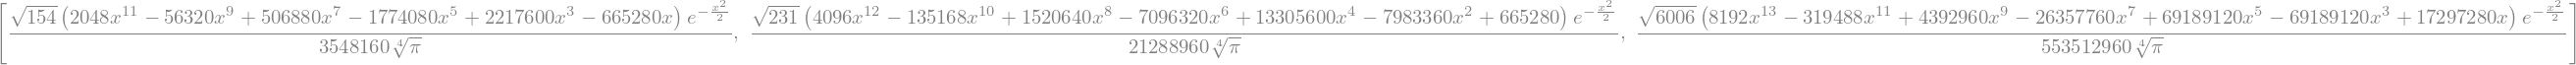

In [9]:
# Compute some of the Harmonic oscillator eigenfunctions functions
x = sy.Symbol('x')
[psi_sho(n, x) for n in range(11, 14)]

## Limits

Often the notation of differential calculus does not sweep out the intricacies of calculating limits of expressions, for example while calculating residues or limiting values of complicated expressions. 

Let us start with a simple example, the limit of function $\frac{\sin(x)}{x}$ as $x \to 0$. In `sympy`, we do the following.

- Define a symbol `x`.
- Using the function `sympy.sinc`, which is the unnormalized sinc function [https://en.wikipedia.org/wiki/Sinc_function]
- Use `sympy.limit` to find the limit of `sinc_unorm` at `x` goes to 0.

In [10]:
# Limit of sin(x)/(x) as x goes to 0
x = sy.Symbol('x')
sinc_unorm = sy.sinc(x)
sy.limit(sinc_unorm, x, 0)

Now let us consider the normalized sinc function $\frac{\sin(\pi x)}{\pi x}$ and its limit as $x \to 0$. For this we need to define our own function `sinc_norm` which is the normalized sinc function. See, for instance, [https://en.wikipedia.org/wiki/Sinc_function]. We do the following

- Define a symbol `x`.
- Using the function `sympy.sin` and the symbol `sympy.pi`, define a function `sinc_norm` which is the unnormalized sinc function [https://en.wikipedia.org/wiki/Sinc_function]
- Use `sympy.limit` to find the limit of `sinc_norm` at `x` goes to 0.

Note for those who use MATLAB/Octave: in MATLAB/Octave, the `sinc` function is the normalized sinc function.

In [11]:
# Limit of sin(pi*x)/(pi*x) as x goes to 0
x = sy.Symbol('x')
sinc_norm = sy.sin(sy.pi*x) / (sy.pi * x)
sy.limit(sinc_norm, x, 0)

Next we consider an expression of the form $\frac{e^{-kr}}{r}$. We want to find its limiting value as $r \to \infty$. We assume $k > 0$. For this we do the following.
- Define a symbol `x`
- Define a symbol `k`. Declare it to be positive, using `positive=True` as an argument of `sympy.Symbol`
- Use the function `sympy.exp` to define a function `exp_kr_over_r` which represents the expression  $\frac{e^{-kr}}{r}$
- Use `sympy.limit` to find the limit of `exp_kr_over_r` at `x` goes to `sympy.oo`. Here `sympy.oo` is the symbol which `sympy` uses to represent $\infty$.

In [12]:
# Limit of exp(-k*r)/r as r goes to infinity
r = sy.Symbol('r')
k = sy.Symbol('k', positive=True)
exp_kr_over_r = sy.exp(-k*r) / r
sy.limit(exp_kr_over_r, r, sy.oo)